# Wireless Intrusion Detection System

- Intrusion Detection Systems (IDS) provide means of identifying and possibly responding to a threat in a timely fashion.
- Dataset: AWID-3: Format: PCAP, Classes: 13, with SSL-Decryption keys
- Dataset Used: Subset AWID-3: Format: Converted to CSV, Classes: 9, without use of SSL-Decryption keys

## Attack Classes:

1. Association: (Flooding Attack) The association process between the STA and AP takes place after successful open authentication. It involves the exchange of a pair of association request/response frames.
2. Deauthentication: It is a DoS attack, that sends disassocate packets to one or more clients which are currently associated with a particular access point.
3. Disassociation: Targeted deauthentication attack.
4. Evil-Twin: A fraudulent Wi-Fi access point that appears to be legitimate but is set up to eavesdrop on wireless communications.
5. Krack: It takes advantage of the fact that retransmissions of either the first or the third message of the 4-way handshake should occur if the AP does not receive message two or four, respectively. Based on this, the attacker acting as a man-in-the-middle (MitM), blocks message four from reaching the AP, thus making the AP willingly re-transmit the same message toward the STA. This would induce a reinstallation of the same Pairwise Transient Key (PTK) / Group Transient Key (GTK) / Integrity Group Temporal Key (IGTK) at the STA side, meaning that as the STA sends its next data frame, the data WPA2 protocol will reuse the nonces transmitted during the original 4-way handshake. By forcing nonce reuse in this manner, the encryption protocol can be attacked, e.g., packets can be replayed, decrypted, and/or forged.
6. Krook: It is related to Krack, applies to WPA2 as well, but the attacker is not required to be authenticated and associated to the wireless network. The vulnerability is rooted in the fact that as soon as an STA is disassociated, the TK is cleared in memory, i.e., set to all-zero. While this is normal, it was observed that all data frames left in the Wireless Network Controller's (WNIC) egress queue might be then transmitted while encapsulated with this static all-zero key.
7. Rogue AP: Rogue access points that are installed by employees (malicious users or by mistake). In the situation where they are misconfigured or configured without any security, it opens a next attack surface for having easy access to a very secure network
8. Spoofing: The assailant clones the front webpage of a popular website, say, Instagram. Then, they perform ARP and DNS spoofng to redirect the users to their fake webpage instead of the original one.

## Data Loading

In [1]:
import numpy as np
import pandas as pd

def load_data(file_path):
    '''Fuction to load csv data file as dataframe from given file path'''
    df = pd.read_csv(file_path, sep='*')
    return df

df = load_data('data/ReCombined.csv')
print('Shape of data: ', df.shape)
df.head()

Shape of data:  (1006568, 35)


,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.channel,...,wlan.fc.protected,wlan.duration,wlan.ra,wlan.da,wlan.ta,wlan.sa,wlan.bssid,wlan.frag,wlan.seq,class
0,1.608311e+09,0.000000,0.000000,0.000000,272,272,56,"1,0,0","1,0,0","1,0,0",...,0,60,0c:9d:92:54:fe:34,0c:9d:92:54:fe:34,88:66:a5:55:a2:d4,88:66:a5:55:a2:d4,0c:9d:92:54:fe:34,0.0,1658.0,asso
1,1.608311e+09,6.945121,6.945121,6.945121,264,264,56,"1,0,0","1,0,0","1,0,0",...,0,60,0c:9d:92:54:fe:34,0c:9d:92:54:fe:34,a4:08:ea:2a:9a:01,a4:08:ea:2a:9a:01,0c:9d:92:54:fe:34,0.0,31.0,asso
2,1.608311e+09,27.464727,27.464727,34.409848,207,207,56,"1,0,0","1,0,0","1,0,0",...,0,58,0c:9d:92:54:fe:34,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,50:3e:aa:e3:1f:be,0c:9d:92:54:fe:34,0.0,1.0,asso
3,1.608311e+09,8.909021,8.909021,43.318869,207,207,56,"1,0,0","1,0,0","1,0,0",...,0,58,0c:9d:92:54:fe:34,0c:9d:92:54:fe:34,50:3e:aa:e4:01:93,50:3e:aa:e4:01:93,0c:9d:92:54:fe:34,0.0,1.0,asso
4,1.608311e+09,26.573475,26.573475,69.892344,285,285,56,"1,0,0","1,0,0","1,0,0",...,0,60,0c:9d:92:54:fe:34,0c:9d:92:54:fe:34,94:e9:79:82:c5:77,94:e9:79:82:c5:77,0c:9d:92:54:fe:34,0.0,562.0,asso


## Exploratory Data Analysis

In [2]:
df.describe()

,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.mactime,radiotap.datarate,radiotap.channel.freq,...,wlan.fc.type,wlan.fc.subtype,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.duration,wlan.frag,wlan.seq
count,1.006568e+06,1.006568e+06,1.006568e+06,1.006568e+06,1.006568e+06,1.006568e+06,1.006568e+06,3.748630e+05,406255.000000,1.006568e+06,...,1.006568e+06,1.006568e+06,1.006568e+06,1.006568e+06,1.006568e+06,1.006568e+06,1.006568e+06,1.006568e+06,965126.000000,965126.000000
mean,1.608262e+09,2.573884e-03,2.573884e-03,1.981829e+02,3.591794e+02,3.591794e+02,6.068403e+01,1.146924e+10,7.565214,5.042779e+03,...,1.310435e+00,8.797593e+00,9.934749e-06,8.452385e-02,2.822462e-03,7.369596e-03,5.329963e-01,9.958258e+01,0.001241,2045.077775
std,3.879739e+05,3.237289e-01,3.237289e-01,1.281104e+02,5.265594e+02,5.265594e+02,3.950959e+00,3.335258e+09,6.072455,6.002605e+02,...,9.286869e-01,1.460665e+00,3.151930e-03,2.781720e-01,5.305185e-02,8.552949e-02,4.989103e-01,2.383332e+02,0.108054,1193.775009
min,1.607630e+09,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+01,7.000000e+01,4.800000e+01,2.559810e+09,1.000000,2.417000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.608061e+09,2.000000e-06,2.000000e-06,8.414084e+01,8.600000e+01,8.600000e+01,5.600000e+01,8.547350e+09,6.000000,5.180000e+03,...,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.800000e+01,0.000000,996.000000
50%,1.608061e+09,1.430000e-04,1.430000e-04,1.618292e+02,1.640000e+02,1.640000e+02,6.400000e+01,8.635766e+09,6.000000,5.180000e+03,...,2.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.800000e+01,0.000000,2038.000000
75%,1.608310e+09,6.360000e-04,6.360000e-04,3.199087e+02,1.640000e+02,1.640000e+02,6.400000e+01,1.530370e+10,6.000000,5.180000e+03,...,2.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.400000e+01,0.000000,3120.000000
max,1.609010e+09,3.209698e+02,3.209698e+02,5.932613e+02,2.527000e+03,2.527000e+03,6.400000e+01,2.244090e+10,144.444000,5.180000e+03,...,2.000000e+00,1.400000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.076800e+04,15.000000,4095.000000


### Class Distribution

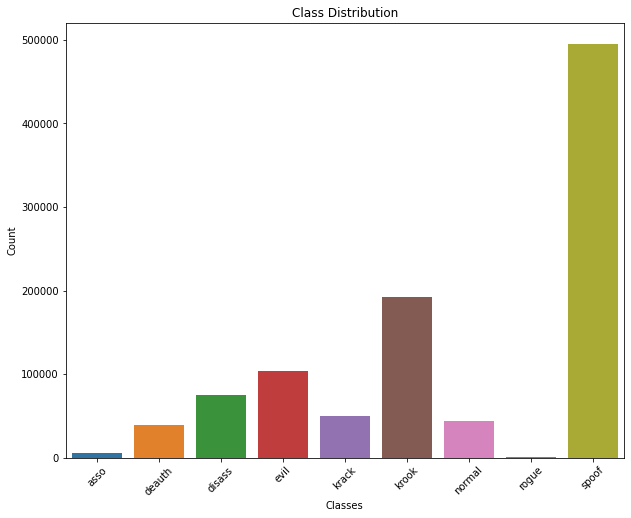

{'asso': 5511, 'deauth': 38942, 'disass': 75131, 'evil': 104351, 'krack': 49990, 'krook': 191803, 'normal': 44056, 'rogue': 1310, 'spoof': 495474}


In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

def class_distrib(df):
    '''This function displays class distribution as a bar plot for the given dataframe'''
    unique, counts = np.unique(df['class'], return_counts=True)
    distrib = dict(zip(unique, counts))

    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(distrib.keys()), y=list(distrib.values()))
    plt.title("Class Distribution")
    plt.xticks(rotation=45)
    plt.xlabel("Classes")
    plt.ylabel("Count")

    plt.show()
    print(distrib)
    
class_distrib(df)

- This is unbalanced data, we need to downsample the majority class

### Subset majority class

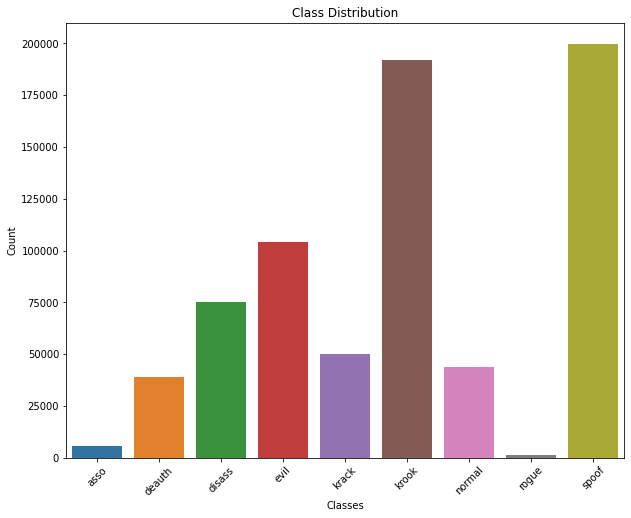

{'asso': 5511, 'deauth': 38942, 'disass': 75131, 'evil': 104351, 'krack': 49990, 'krook': 191803, 'normal': 44056, 'rogue': 1310, 'spoof': 199900}


In [4]:
def subset_sample(df, class_name, n):
    '''This function extracts n range subset from the given dataframe for the given input class'''
    df_maj = df[df['class'] == class_name]
    df = df[df['class'] != class_name]

    df_maj = df_maj[100 : n]

    df = pd.concat([df_maj, df], axis=0)

    return df

df = subset_sample(df, 'spoof', 200000)
class_distrib(df)

### Shallow cleaning

In [4]:
# Rows which still have some NaN value 
df_nan_rows = df[df.isnull().any(axis=1)]
print('All class rows which still have some NaN value: ', len(df_nan_rows))

df_nan_rows_normal = df[df.isnull().any(axis=1)][df['class'] == 'normal']
print('Normal class rows which still have some NaN value: ', len(df_nan_rows_normal))

All class rows which still have some NaN value:  378450
Normal class rows which still have some NaN value:  39852


<ipython-input-4-96976fefc985>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_nan_rows_normal = df[df.isnull().any(axis=1)][df['class'] == 'normal']


In [5]:
def shallow_clean(df):
    '''Cleans the the given dataframe at a shallow level'''
    # Remove columns with >= 85% NaNs
    thres_limit = len(df) * 0.25
    df = df.dropna(thresh=int(thres_limit), axis=1)

    # Remove columns with constant value
    df = df.drop(columns=df.columns[df.nunique()==1])

    # Remove rows with >= 50% NaNs
    thres_limit = df.shape[1] * 0.50
    df = df.dropna(thresh=int(thres_limit), axis=0)
    
    return df

cols_before = set(df.columns)
df = shallow_clean(df)
cols_after = set(df.columns)
print('Columns removed:', cols_before - cols_after)

Columns removed: {'radiotap.present.dbm_antsignal', 'radiotap.present.channel', 'radiotap.present.flags', 'radiotap.present.antenna', 'radiotap.present.rxflags'}


In [6]:
df.isna().any()

frame.time_epoch              False
frame.time_delta              False
frame.time_delta_displayed    False
frame.time_relative           False
frame.len                     False
frame.cap_len                 False
radiotap.length               False
radiotap.present.tsft         False
radiotap.mactime               True
radiotap.datarate              True
radiotap.channel.freq         False
radiotap.dbm_antsignal        False
wlan.fc.type_subtype          False
wlan.fc.type                  False
wlan.fc.subtype               False
wlan.fc.ds                    False
wlan.fc.frag                  False
wlan.fc.retry                 False
wlan.fc.pwrmgt                False
wlan.fc.moredata              False
wlan.fc.protected             False
wlan.duration                 False
wlan.ra                       False
wlan.da                        True
wlan.ta                        True
wlan.sa                        True
wlan.bssid                     True
wlan.frag                   

In [7]:
df.dtypes

frame.time_epoch              float64
frame.time_delta              float64
frame.time_delta_displayed    float64
frame.time_relative           float64
frame.len                       int64
frame.cap_len                   int64
radiotap.length                 int64
radiotap.present.tsft          object
radiotap.mactime              float64
radiotap.datarate             float64
radiotap.channel.freq           int64
radiotap.dbm_antsignal         object
wlan.fc.type_subtype            int64
wlan.fc.type                    int64
wlan.fc.subtype                 int64
wlan.fc.ds                     object
wlan.fc.frag                    int64
wlan.fc.retry                   int64
wlan.fc.pwrmgt                  int64
wlan.fc.moredata                int64
wlan.fc.protected               int64
wlan.duration                   int64
wlan.ra                        object
wlan.da                        object
wlan.ta                        object
wlan.sa                        object
wlan.bssid  

## Pre-processing

### Replace NaNs

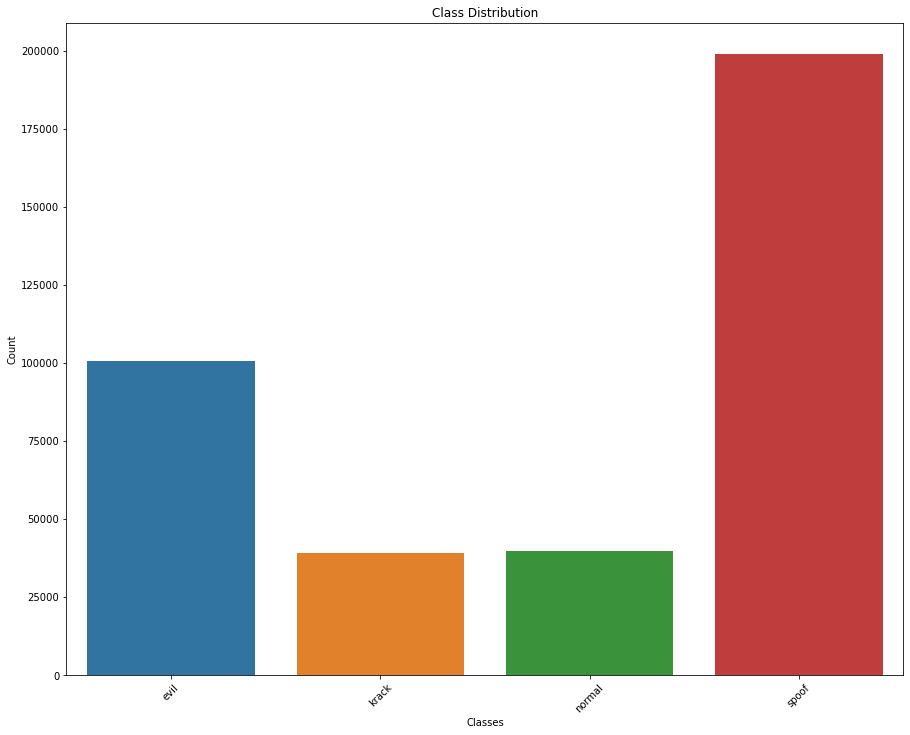

{'evil': 100554, 'krack': 39004, 'normal': 39852, 'spoof': 199040}


In [8]:
class_distrib(df_nan_rows)

In [9]:
#Fill the NULL values
num_nan_cols = ['radiotap.mactime', 'radiotap.datarate', 'wlan.frag', 'wlan.seq']
for c in num_nan_cols:
    df[c].fillna(value=df[c].mean(), inplace=True)
    
cat_nan_cols = ['wlan.ra', 'wlan.da', 'wlan.ta', 'wlan.bssid', 'wlan.sa']
for c in cat_nan_cols:
    df[c].fillna(value='null', inplace=True)
    
df.columns[df.isna().any()].tolist()

[]

### Analyzing object type data

In [10]:
object_cols = list(df.select_dtypes(['object']))
print('Unique category counts: ')
for c in object_cols:
    print(c, '=>', df[c].value_counts().count())

Unique category counts: 
radiotap.present.tsft => 2
radiotap.dbm_antsignal => 1192
wlan.fc.ds => 4
wlan.ra => 382
wlan.da => 483
wlan.ta => 432
wlan.sa => 463
wlan.bssid => 323
class => 9


In [11]:
cols_drop = ['wlan.da', 'wlan.ra', 'wlan.ta', 'wlan.sa', 'wlan.bssid', 'radiotap.dbm_antsignal']
df = df.drop(cols_drop, axis=1)

In [12]:
# Save processed data to file
df.to_csv('data/train_processed_1.csv', index=False)

In [13]:
# Load processed data to df
# df = pd.read_csv('data/train_processed_1.csv')

### Standardizing

In [13]:
X = df.drop(['class'], axis=1)
y = df['class']

In [14]:
from sklearn.preprocessing import StandardScaler
import joblib

std_cols = ['frame.time_epoch', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_relative', 'frame.len',
           'frame.cap_len', 'radiotap.length', 'radiotap.mactime', 'radiotap.datarate', 'radiotap.channel.freq',
           'wlan.duration', 'wlan.frag', 'wlan.seq']
with open('scaler_save/columns.txt', 'w') as f:
    [f.write(c+'\n') for c in std_cols]

standard_scaler = StandardScaler()
X[std_cols] = standard_scaler.fit_transform(X[std_cols])

# Save this scalar to file
joblib.dump(standard_scaler, 'scaler_save/scaler.gz')

['scaler_save/scaler.gz']

### One-hot encoding (BoW)

In [15]:
from sklearn.preprocessing import OneHotEncoder

enc_cols = ['wlan.fc.type_subtype', 'wlan.fc.type', 'wlan.fc.subtype', 'wlan.fc.ds', 'radiotap.present.tsft']

with open('encoder_save/columns.txt', 'w') as f:
    [f.write(c+'\n') for c in enc_cols]
    
oh_encoder_x = OneHotEncoder(sparse=False, handle_unknown='ignore')
array_ohe = oh_encoder_x.fit_transform(X[enc_cols])
df_ohe = pd.DataFrame(array_ohe, index=df.index)

#Extract only the columns that didnt need to be encoded
df_other = X.drop(columns=enc_cols)

#Concatenate the two dataframes : 
X = pd.concat([df_ohe, df_other], axis=1)

# Save this encoder to file
joblib.dump(oh_encoder_x, 'encoder_save/encoder.gz')

['encoder_save/encoder.gz']

In [16]:
print('Shape of y before encoding: ', y.shape)
print('ReShape of y for encoding: ', y.values.reshape(-1, 1).shape)

oh_encoder_y = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_categorical = oh_encoder_y.fit_transform(y.values.reshape(-1, 1))
print('Shape of y after encoding: ', y_categorical.shape)

Shape of y before encoding:  (710994,)
ReShape of y for encoding:  (710994, 1)
Shape of y after encoding:  (710994, 9)


In [17]:
df.shape, X.shape, y.shape, y_categorical.shape

((710994, 24), (710994, 64), (710994,), (710994, 9))

### Dataframe to time series

In [20]:
def time_series(X, chunk_size):
    si = chunk_size
    ei = len(X)
    
    data = []

    for i in range(si, ei):
        idx = range(i - chunk_size, i, 1)
        data.append(X[idx])

    data = np.array(data)
    return data

chunk_size = 10
X_time = time_series(X.values, chunk_size)
X_time.shape

(710984, 10, 64)

### Test train split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_time, y_categorical[chunk_size:], test_size=0.33, stratify=y[chunk_size:])
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.33, stratify=y_val)

### Write relevant features to file

In [22]:
relevant_columns = df.columns
with open('data/relevant_columns.txt', 'w') as f:
    [f.write(rc+'\n') for rc in relevant_columns]

### Writing class labels to file

In [23]:
class_labels = oh_encoder_y.categories_[0]
with open('data/class_labels.txt', 'w') as f:
    [f.write(cl+'\n') for cl in class_labels]

In [24]:
X_train.shape[1:3]

(10, 64)

## Deep Learning Model

### Model definition

In [25]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

def create_model(input_shape, n_class):
    """This function creates a simple DL model"""
    input_layer = tf.keras.Input(shape=(input_shape))
    
    gru_layer = layers.GRU(16, return_sequences=False)(input_layer)
    
    dense_layer1 = layers.Dense(16, activation='relu')(gru_layer)
    dense_layer2 = layers.Dense(32, activation='relu')(dense_layer1)
    
    output_layer = layers.Dense(n_class, activation='softmax')(dense_layer2)
    return Model(input_layer, output_layer)
    
model = create_model(X_train.shape[1:3], len(oh_encoder_y.categories_[0]))

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 64)]          0         
_________________________________________________________________
gru (GRU)                    (None, 16)                3936      
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 297       
Total params: 5,049
Trainable params: 5,049
Non-trainable params: 0
_________________________________________________________________


### Setting model optimizers and callbacks

In [26]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
%load_ext tensorboard

log_dir="tensorboard\\logs"
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True)

checkpoint = ModelCheckpoint(filepath='model_save/best_model.h5', monitor='val_accuracy',
                             verbose=1, save_best_only=True, mode='auto')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=4, verbose=1)

### Model training

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val),
              batch_size=128, callbacks=[checkpoint, earlystop, tensorboard])

Epoch 1/5
1317/3722 [=========>....................] - ETA: 11s - loss: 0.1303 - accuracy: 0.9629

### Model performance

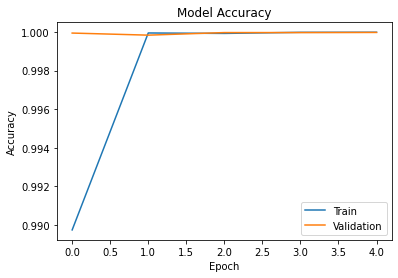

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### Model results

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

y_preds_val = np.argmax(model.predict(X_val), axis=1)
y_val = np.argmax(y_val, axis=1)
y_preds_test = np.argmax(model.predict(X_test), axis=1)
y_test = np.argmax(y_test, axis=1)
y_preds_train = np.argmax(model.predict(X_train), axis=1)
y_train = np.argmax(y_train, axis=1)

with open('data/class_labels.txt', 'r') as f:
    class_labels = np.array([line.strip() for line in f])

cm_val = confusion_matrix(class_labels[y_val], class_labels[y_preds_val])
cm_test = confusion_matrix(class_labels[y_test], class_labels[y_preds_test])
cm_train = confusion_matrix(class_labels[y_train], class_labels[y_preds_train])

df_cm_val = pd.DataFrame(cm_val, columns=class_labels, index=class_labels)
df_cm_train = pd.DataFrame(cm_train, columns=class_labels, index=class_labels)
df_cm_test = pd.DataFrame(cm_test, columns=class_labels, index=class_labels)
df_cm_val.index.name = df_cm_train.index.name = df_cm_test.index.name = 'Actual'
df_cm_val.columns.name = df_cm_train.columns.name = df_cm_test.columns.name = 'Predicted'

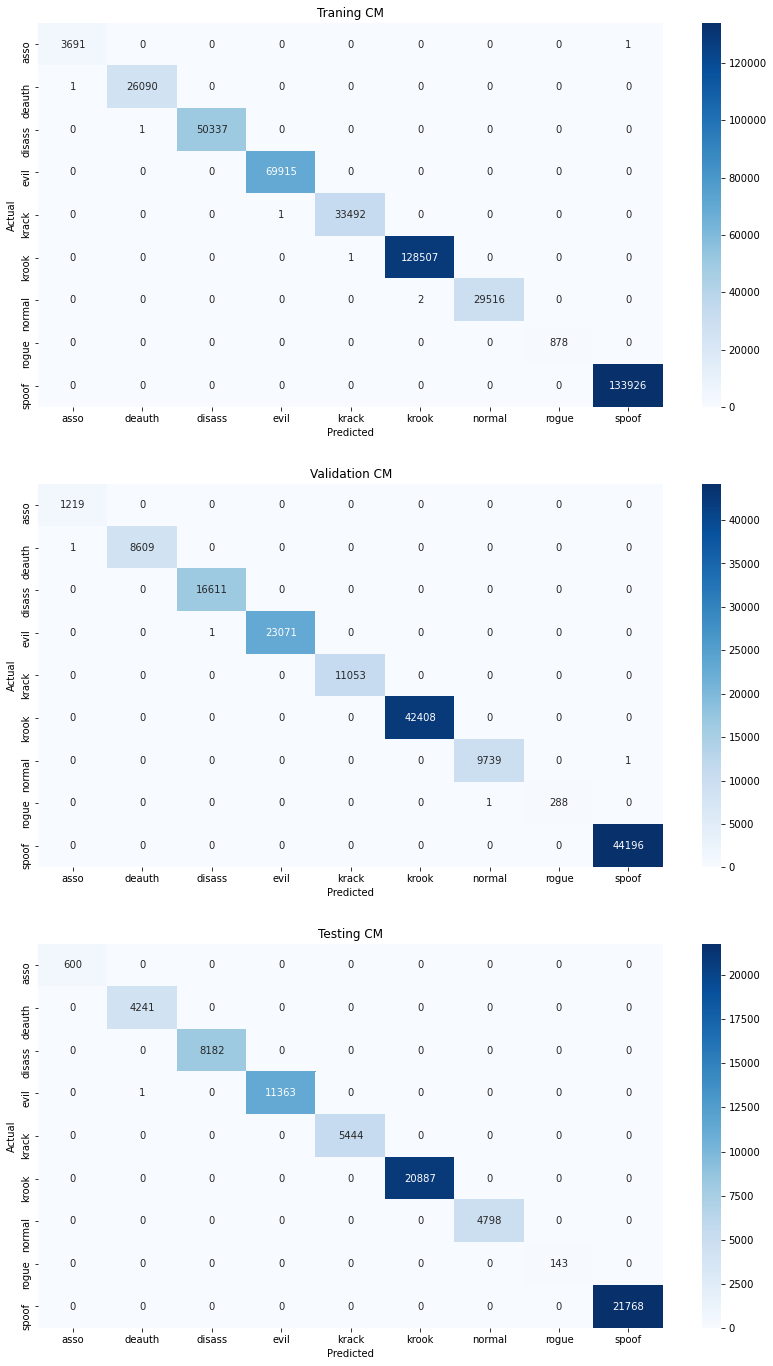

In [30]:
fig = plt.figure(figsize = (14, 24))

fig.add_subplot(3, 1, 1)
sp2 = sns.heatmap(df_cm_train, cmap="Blues", annot=True, fmt='g')
sp2.set_title('Traning CM')

fig.add_subplot(3, 1, 2)
sp1 = sns.heatmap(df_cm_val, cmap="Blues", annot=True, fmt='g')
sp1.set_title('Validation CM')

fig.add_subplot(3, 1, 3)
sp2 = sns.heatmap(df_cm_test, cmap="Blues", annot=True, fmt='g')
sp2.set_title('Testing CM')

plt.show()

In [31]:
print(classification_report(class_labels[y_val], class_labels[y_preds_val], target_names=list(class_labels)))
print(classification_report(class_labels[y_test], class_labels[y_preds_test], target_names=list(class_labels)))

              precision    recall  f1-score   support

        asso       1.00      1.00      1.00      1219
      deauth       1.00      1.00      1.00      8610
      disass       1.00      1.00      1.00     16611
        evil       1.00      1.00      1.00     23072
       krack       1.00      1.00      1.00     11053
       krook       1.00      1.00      1.00     42408
      normal       1.00      1.00      1.00      9740
       rogue       1.00      1.00      1.00       289
       spoof       1.00      1.00      1.00     44196

    accuracy                           1.00    157198
   macro avg       1.00      1.00      1.00    157198
weighted avg       1.00      1.00      1.00    157198

              precision    recall  f1-score   support

        asso       1.00      1.00      1.00       600
      deauth       1.00      1.00      1.00      4241
      disass       1.00      1.00      1.00      8182
        evil       1.00      1.00      1.00     11364
       krack       1.00 